**Text Mining in R**


# Text und Tokens

Jan R. Riebling

In [8]:
library(tidyverse)
library(tidytext)
library(rvest)
library(tm)

Lade nötiges Paket: NLP


Attache Paket: ‘NLP’


Das folgende Objekt ist maskiert ‘package:ggplot2’:

    annotate




# Korpora

## Textdaten

Textdaten werden normalerweise in der Form von Korpora verwaltet. Diese unterscheiden sich von herkömmlichen Datentabellen wie folgt:

* Komplexe Mehrebenenstruktur (z.B.: Metadaten, Annotationen, etc.).
* Großer Speicherbedarf aufgrund nicht-numerischer Datentypen.

## Korpusmanagement

Innerhalb von R gibt es vierschiedene Pakete welche Datenklassen für Textdaten und Korpora bereitstellen. Unter anderem:

* `quanteda`: Ein [Paket](https://github.com/quanteda/quanteda) ausgerichtet auf sozialwissenschaftliche Analysen von Textkorpora.
* `tm`: [Paket](https://mran.microsoft.com/snapshot/2018-03-30/web/packages/tm/vignettes/tm.pdf) mit starkem Fokus auf Text Mining und Korpusmanagement.
* `koRpus`: Natural Language Processing [Paket](https://cran.r-project.org/web/packages/koRpus/vignettes/koRpus_vignette.html) mit eigenen Korpus- und Text-Datenklassen. 

## Pragmatischer Ansatz

Ein sinnvolles Korpusmanagement sollte immer an die Erfordernisse des jeweiligen Projekts angepasst sein. Aufgrund der unterschiedlichen Zugänge, Erfordernisse der Daten und Zielsetzungen, kann hier keine eindeutige Empfehlung gegeben werden.

Stattdessen, grundlegende Prinzipien des Umgangs mit Textdaten und der auf R Vektoren aufbauende [tidytext](https://www.tidytextmining.com/)-Ansatz.

## ~~Korpuserstellung~~

## `Corpus`

Basis-Klasse für Textsammlungen in `tm`. Baut auf dem `list` Datentyp auf. Um eine Textsammlung in den R Namespace zu laden muss eine Quelle angegeben werden. Z.B.:

* `DirSource()`: Erzeugt Korpus auf Basis eines lokalen Verzeichnispfads.
* `VectorSource()`: Quelle ist ein Vector in dem jedes Element ein Dokument darstellt.
* `DataframeSource()`: Interpretiert data.frame oder ähnliche Strukturen (CSV) als Quelle.


In [6]:
tm::getSources()

[1] "DataframeSource" "DirSource"       "URISource"       "VectorSource"   
[5] "XMLSource"       "ZipSource"

## Reader

Dient zum Einlesen verschiedener Formate und kann über `readerControl` während der Korpuserstellung eingebunden werden. Allerdings kann es dabei zu diversen Problemen kommen.

In [7]:
tm::getReaders()

[1] "readDataframe"           "readDOC"                
 [3] "readPDF"                 "readPlain"              
 [5] "readRCV1"                "readRCV1asPlain"        
 [7] "readReut21578XML"        "readReut21578XMLasPlain"
 [9] "readTagged"              "readXML"

In [43]:
docs <- Corpus(DirSource("../data/GesetzeBayernPDF/"),
               readerControl=list(reader=readPDF(engine='xpdf'),
                                  language="de"))

Warning message in system2("pdftotext", c(control$text, shQuote(x), "-"), stdout = TRUE):
“Ausführung von Kommando ''pdftotext' '../data/GesetzeBayernPDF//BayVV_2030_2_3_K_12038.pdf' -' ergab Status 1”


In [44]:
docs$content[[1]]$meta

  author       : character(0)
  datetimestamp: character(0)
  description  : character(0)
  heading      :  Bürgerservice
  id           : AkadGrAuslHsStV.pdf
  language     : de
  origin       : character(0)

In [11]:
pdfs[[2]]$content

[1] "Guide to “Text Analysis and Topic Modelling in"                                                                                                      
 [2] "R”"                                                                                                                                                  
 [3] "Jan R. Riebling"                                                                                                                                     
 [4] "January 30, 2017"                                                                                                                                    
 [5] ""                                                                                                                                                    
 [6] "Summary"                                                                                                                                             
 [7] "This guide aims to be a short introduction to the workshop “Text Analysis and"                                                                       
 [8] "Topic Modelling in R”, which will take place from the 1. to the 3. of February"                                                                      
 [9] "’16. It will cover the basic setup procedures to get ready for the workshop."                                                                        
[10] ""                                                                                                                                                    
[11] "Workshop schedule"                                                                                                                                   
[12] "Depending on the needs of the participants this schedule may be subject to"                                                                          
[13] "change."                                                                                                                                             
[14] "Wednesday, 01.Feb ’17"                                                                                                                               
[15] "09:00-10:30 Introduction"                                                                                                                            
[16] "Short break"                                                                                                                                         
[17] "11:00-12:30 R Data Structures"                                                                                                                       
[18] "Lunch break"                                                                                                                                         
[19] "14:00-15:30 Basic Techniques"                                                                                                                        
[20] "Short break"                                                                                                                                         
[21] "16:00-17:30 Statistical Analysis and Models"                                                                                                         
[22] "Thursday, 02.Feb ’17"                                                                                                                                
[23] "09:00-10:30 Text"                                                                                                                                    
[24] "Short break"                                                                                                                                         
[25] "11:00-12:30 Tokens"                                                                                                                                  
[26] "Lunch break"                                                                                   

## Writing

The documents of a corpus can be written to multiple TXT-files using `writeCorpus()`. In the case of many short documents, it might be prefereable to write them to a single file using `writeLines()`.

* `writeCorpus(x, path=".", filenames=NULL)`
* `writeLines(text, con=stdout(), sep="\n", useBytes=FALSE)`

## Plaintext

Um sinnvoll mit Textdaten arbeiten zu können sollten diese stets in einem Plaintext-Format vorliegen. Für die Konvertierung zu (und von) Plaintext gibt es eine Vielzahl von Programmen, die auch über R-Wrapper zur Verfügung stehen. Allerdings arbeiten die meisten Kommandozeilenprogramme effizienter und fehlerfreier, wenn Sie direkt angewendet werden.

* [Pandoc](): Das Schweizer-Taschenmesser der Textkonvertierung ([Handbuch](https://pandoc.org/MANUAL.html)).
* [pdftotext](https://en.wikipedia.org/wiki/Pdftotext): Gängiges Kommandozeilentool zur PDF-Konvertierung. 

#  `pdftotext`

Batch Konvertierung auf der Kommandozeile:

```bash
for file in *.pdf; do pdftotext -nopgbrk $file ../GesetzeBayernTXT/${file/.pdf/.txt}; done
```

## HTML Konvertierung

Hier bietet `rvest` eine gute Möglichkeit Daten aufzubereiten und Metadaten zu extrahieren.

In [12]:
## Text
read_html('../data/GesetzeBayernHTML/AkadGrAuslHsStV.html', encoding='utf8') %>% html_node('div.cont') %>% html_text()

[1] "\r\n    Abkommen zwischen den Ländern in der Bundesrepublik Deutschland über die Genehmigung zur Führung akademischer Grade ausländischer Hochschulen und entsprechender ausländischer GradeVom 29. Oktober 1992[1]\n    Vollzitat nach RedR: Abkommen über die Genehmigung zur Führung akademischer Grade ausländischer Hochschulen und entsprechender ausländischer Grade vom 29. Oktober 1992 (GVBl. 1993 S. 409, 1996 S. 2, BayRS 02-8-WK)\n    Die Länder Baden-Württemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein und Thüringen schließen folgendes Abkommen:\n    \n    \n    \n    \n    \n    \n  [1] Das Abkommen wurde ratifiziert in:Baden-Württemberg: G v. 12.12.1994 (GBl. S. 644),Bayern: Bek. v. 12.6.1993 (GVBl. S. 409),Brandenburg: G v. 19.10.1993 (GVBl. I S. 458),Hamburg: G v. 1.11.1993 (GVBl. S. 295),Hessen: G v. 1.12.1993 (GVBl. I S. 606),Nordrhein-Westfalen: Bek. v. 15.6.1993 (GV. NRW. S. 339),Rheinland-Pfalz: G v. 14.7.1993 (GVBl. S. 392),Sachsen: G v. 27.9.1995 (SächsGVBl. S. 327),Sachsen-Anhalt: G v. 10.11.1993 (GVBl. LSA S. 696).\r\n"

In [11]:
## Gültig ab:
read_html('../data/GesetzeBayernHTML/AkadGrAuslHsStV.html', encoding='utf8') %>% html_text() %>% str_match('Text gilt ab: (.+)')

Text gilt ab: 07.11.1995,07.11.1995


In [13]:
texts <- c()
titles <- c()
validdates <- c()

for (file in list.files('../data/GesetzeBayernHTML/', full.names=TRUE)) {
    html <- read_html(file, encoding='utf8')
    text <- html %>% html_node('div.cont') %>% html_text()
    texts <- append(texts, text)
    validdate <- html %>% html_text() %>% str_match('Text gilt ab: (.+)')
    validdates <- append(validdates, validdate[,2])
} 

In [14]:
text_df <- tibble(docs=list.files('../data/GesetzeBayernHTML/'), 
                  validdate=validdates,
                  text=texts)
text_df

docs,validdate,text
<chr>,<chr>,<chr>
AkadGrAuslHsStV.html,07.11.1995,"Abkommen zwischen den Ländern in der Bundesrepublik Deutschland über die Genehmigung zur Führung akademischer Grade ausländischer Hochschulen und entsprechender ausländischer GradeVom 29. Oktober 1992[1] Vollzitat nach RedR: Abkommen über die Genehmigung zur Führung akademischer Grade ausländischer Hochschulen und entsprechender ausländischer Grade vom 29. Oktober 1992 (GVBl. 1993 S. 409, 1996 S. 2, BayRS 02-8-WK) Die Länder Baden-Württemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein und Thüringen schließen folgendes Abkommen: [1] Das Abkommen wurde ratifiziert in:Baden-Württemberg: G v. 12.12.1994 (GBl. S. 644),Bayern: Bek. v. 12.6.1993 (GVBl. S. 409),Brandenburg: G v. 19.10.1993 (GVBl. I S. 458),Hamburg: G v. 1.11.1993 (GVBl. S. 295),Hessen: G v. 1.12.1993 (GVBl. I S. 606),Nordrhein-Westfalen: Bek. v. 15.6.1993 (GV. NRW. S. 339),Rheinland-Pfalz: G v. 14.7.1993 (GVBl. S. 392),Sachsen: G v. 27.9.1995 (SächsGVBl. S. 327),Sachsen-Anhalt: G v. 10.11.1993 (GVBl. LSA S. 696)."
BayAbfZustV.html,01.06.2022,"Abfallzuständigkeitsverordnung (AbfZustV)Vom 17. Mai 2022(GVBl. S. 226)BayRS 2129-2-1-1-U Vollzitat nach RedR: Abfallzuständigkeitsverordnung (AbfZustV) vom 17. Mai 2022 (GVBl. S. 226, BayRS 2129-2-1-1-U) Es verordnen – die Bayerische Staatsregierung auf Grund – des Art. 1 Abs. 2 des Zuständigkeitsgesetzes (ZustG) vom 7. Mai 2013 (GVBl. S. 246, BayRS 2015-1-V), das zuletzt durch § 1 Abs. 36 der Verordnung vom 26. März 2019 (GVBl. S. 98) geändert worden ist, und – des Art. 11 Abs. 1 Satz 2 des Bayerischen Abfallwirtschaftsgesetzes (BayAbfG) in der Fassung der Bekanntmachung vom 9. August 1996 (GVBl. S. 396, 449, BayRS 2129-2-1-U), das zuletzt durch § 2 des Gesetzes vom 25. Mai 2021 (GVBl. S. 286) geändert worden ist, und – das Bayerische Staatsministerium für Umwelt und Verbraucherschutz auf Grund des Art. 25 Abs. 2 des Bayerischen Abfallwirtschaftsgesetzes (BayAbfG) in der Fassung der Bekanntmachung vom 9. August 1996 (GVBl. S. 396, 449, BayRS 2129-2-1-U), das zuletzt durch § 2 des Gesetzes vom 25. Mai 2021 (GVBl. S. 286) geändert worden ist:"
BayAbmG.html,01.05.2019,"Gesetz über die Abmarkung der Grundstücke (Abmarkungsgesetz – AbmG)Vom 6. August 1981(BayRS III S. 690)BayRS 219-2-F Vollzitat nach RedR: Abmarkungsgesetz (AbmG) in der in der Bayerischen Rechtssammlung (BayRS 219-2-F) veröffentlichten bereinigten Fassung, das zuletzt durch § 1 Abs. 182 der Verordnung vom 26. März 2019 (GVBl. S. 98) geändert worden ist"
BayABOB.html,01.01.2002,"Allgemeine Benützungsordnung der Bayerischen Staatlichen Bibliotheken (ABOB)Vom 18. August 1993(GVBl. S. 635)BayRS 2240-3-WK Vollzitat nach RedR: Allgemeine Benützungsordnung der Bayerischen Staatlichen Bibliotheken (ABOB) vom 18. August 1993 (GVBl. S. 635, BayRS 2240-3-WK), die zuletzt durch § 1 Abs. 253 der Verordnung vom 26. März 2019 (GVBl. S. 98) geändert worden ist Auf Grund des § 1 der Verordnung über die Einrichtung der staatlichen Behörden und des Art. 32 Abs. 5 Satz 6 des Bayerischen Hochschulgesetzes sowie des Art. 25 Abs. 1 Satz 1 Nr. 1 des Kostengesetzes erläßt das Bayerische Staatsministerium für Unterricht, Kultus, Wissenschaft und Kunst soweit erforderlich im Einvernehmen mit dem Bayerischen Staatsministerium der Finanzen folgende Verordnung:"
BayAGO.html,01.01.2022,"Allgemeine Geschäftsordnung für die Behörden des Freistaates Bayern (AGO)Vom 12. Dezember 2000(GVBl. S. 873; 2001 S. 28)BayRS 200-21-I Vollzitat nach RedR: Allgemeine Geschäftsordnung für die Behörden des Freistaates Bayern (AGO) vom 12. Dezember 2000 (GVBl. S. 873; 2001 S. 28 BayRS 200-21-I), die zuletzt durch Bekanntmachung vom 14. Dezember 2021 (GVBl. S. 695) geändert worden ist Auf Grund des Art. 43 Abs. 1 der Verfassung erlässt die Bayerische Staatsregierung folgende Allgemeine Geschäftsordnung:"
Ba

In [127]:
## Speichern

write_csv(text_df, '../data/GesetzeBayernText.csv')

# Type und Token

> In another sense of the word "word," however, there is but one word "the" in the English language; and it is impossible that this word should lie visibly on a page or be heard in any voice, for the reason that it is not a Single thing or Single event. It does not exist; it only determines things that do exist. Such a definitely significant Form, I propose to term a *Type*. A Single event which happens once and whose identity is limited to that one happening or a Single object or thing which is in some single place at any one instant of time, such event or thing being significant only as occurring just when and where it does, such as this or that word on a single line of a single page of a single copy of a book, I will venture to call a *Token*. 

> (Peirce 1906: 505)

## Token

Tokens bilden die *einzelnen, sinntragenden Elemente* einer Zeichenkette. Whitespace und die Abgrenzung zwischen Sonderzeichen und Worten sind Abgrenzungen zwischen Token in natürlichen Sprachen. 

In [105]:
alice <- '\'When I\'M a Duchess,\' she said to herself, (not in a very hopeful tone though), \'I won\'t have any pepper in my kitchen AT ALL. Soup does very well without--Maybe it\'s always pepper that makes people hot-tempered\'.'
alice

[1] "'When I'M a Duchess,' she said to herself, (not in a very hopeful tone though), 'I won't have any pepper in my kitchen AT ALL. Soup does very well without--Maybe it's always pepper that makes people hot-tempered'."

In [106]:
show(str_split(alice, '\\s+'))

[[1]]
 [1] "'When"          "I'M"            "a"              "Duchess,'"     
 [5] "she"            "said"           "to"             "herself,"      
 [9] "(not"           "in"             "a"              "very"          
[13] "hopeful"        "tone"           "though),"       "'I"            
[17] "won't"          "have"           "any"            "pepper"        
[21] "in"             "my"             "kitchen"        "AT"            
[25] "ALL."           "Soup"           "does"           "very"          
[29] "well"           "without--Maybe" "it's"           "always"        
[33] "pepper"         "that"           "makes"          "people"        
[37] "hot-tempered'."



## Tokenisierung

Zerlegung von Zeichenketten in einzelne Elemente.

* Was wird als grundlegende Einheit ausgewählt?
* Wieviele Ebenen sollen unterscheidbar sein?
* Ist es sinnvoll Informationen weg zu lassen?

## Tokenisierer

Eine Vielzahl von Paketen bieten Funktionen zur Tokenisierer an. Es kann jedoch sinnvol und notwendig sein, eigene Tokenisierung durchzuführen oder den Prozess besser zu kontrollieren. In diesem Fall sind Reguläre Ausdrücke sehr nützlich.

In [107]:
str_extract_all(alice, '\\w+[-\']?\\w*')

[[1]]
 [1] "When"         "I'M"          "a"            "Duchess"      "she"         
 [6] "said"         "to"           "herself"      "not"          "in"          
[11] "a"            "very"         "hopeful"      "tone"         "though"      
[16] "I"            "won't"        "have"         "any"          "pepper"      
[21] "in"           "my"           "kitchen"      "AT"           "ALL"         
[26] "Soup"         "does"         "very"         "well"         "without-"    
[31] "Maybe"        "it's"         "always"       "pepper"       "that"        
[36] "makes"        "people"       "hot-tempered"

## Tidytext Vorgehen

Tidytext und die damit einhergehenden Funktionen und Klassen zielen auf einen Umgang mit Text ab, der auf der `dplyr` Syntax aufbaut und vor allem die Vektorisierung von Funktionen in den Mittelpunkt stellt.

Das Motto lautet: *Ein Token pro Dokument pro Zeile*!

## Unnesting

Die Standardfunktion zur Konstruktion einer tidytext kompatiblen Datenstruktur ist `unnest_tokens()`. Spezifische Tokenisierer können über das Schlüsselwortargument `token=` bereitgestellt werden.

In [111]:
text_df %>% unnest_tokens(word, text)

docs,validdate,word
<chr>,<chr>,<chr>
AkadGrAuslHsStV.html,07.11.1995,abkommen
AkadGrAuslHsStV.html,07.11.1995,zwischen
AkadGrAuslHsStV.html,07.11.1995,den
AkadGrAuslHsStV.html,07.11.1995,ländern
AkadGrAuslHsStV.html,07.11.1995,in
AkadGrAuslHsStV.html,07.11.1995,der
AkadGrAuslHsStV.html,07.11.1995,bundesrepublik
AkadGrAuslHsStV.html,07.11.1995,deutschland
AkadGrAuslHsStV.html,07.11.1995,über


In [110]:
?unnest_tokens

## `dplyr` Notation

Aufbauend auf dem %>% (Pipe) Symbol. Reicht die Ausgabe der vorangegangenen Funktion oder des vorangegangenen Objekts an die nächste Funktion weiter. Erlaubt die schnelle Formulierung von Analysen erschwert jedoch gleichzeitig die Fehlersuche enorm. Ausführliche Dokumentation [hier](https://dplyr.tidyverse.org/).

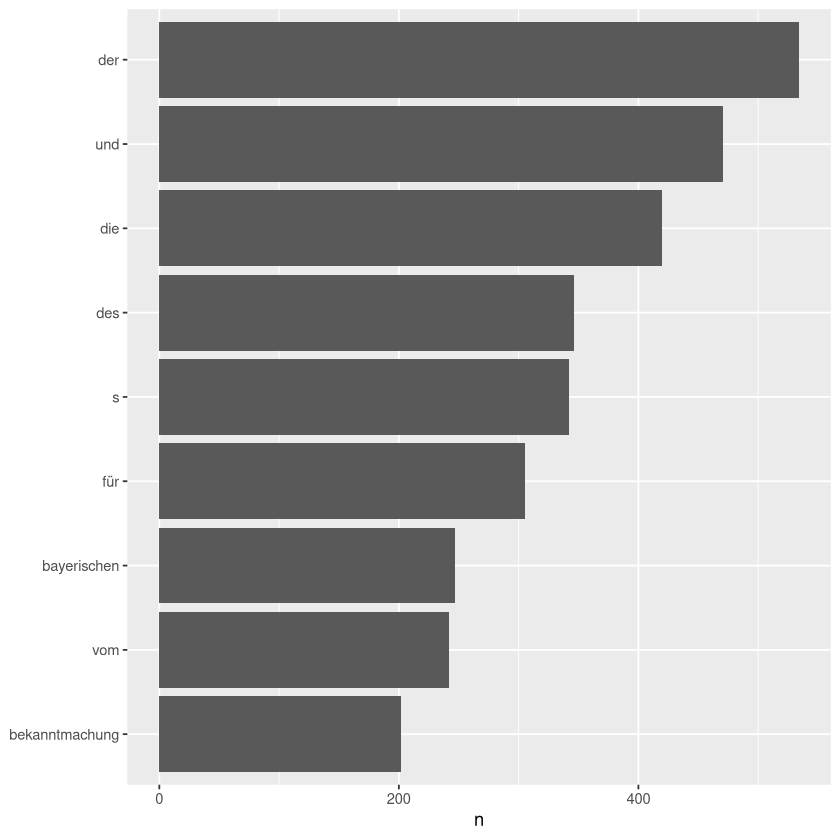

In [116]:
text_df %>% 
  unnest_tokens(word, text) %>%  
  count(word, sort = TRUE) %>%
  filter(n > 200) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word)) +
  geom_col() +
  labs(y = NULL)

# Stemming und Lemmatisation

## Ziel

Bei diesen Verfahren geht es um die Rückführung auf die grammatikalische Grundformen. Dies kann entweder:

* algorithmisch (z.B.: [Snowball-Stemmer](https://snowballstem.org/)) oder
* lexikon-basiert (z.B.: [UDpipe und openNLP](https://ladal.edu.au/tagging.html) oder [TreeTagger](https://www.cis.lmu.de/~schmid/tools/TreeTagger/)) erfolgen.

In [ ]:
install.packages('SnowballC')

In [15]:
token_df <- text_df %>% 
  unnest_tokens(word, text) %>%
  mutate(stem=SnowballC::wordStem(word, language='de'))

token_df

docs,validdate,word,stem
<chr>,<chr>,<chr>,<chr>
AkadGrAuslHsStV.html,07.11.1995,abkommen,abkomm
AkadGrAuslHsStV.html,07.11.1995,zwischen,zwisch
AkadGrAuslHsStV.html,07.11.1995,den,den
AkadGrAuslHsStV.html,07.11.1995,ländern,land
AkadGrAuslHsStV.html,07.11.1995,in,in
AkadGrAuslHsStV.html,07.11.1995,der,der
AkadGrAuslHsStV.html,07.11.1995,bundesrepublik,bundesrepubl
AkadGrAuslHsStV.html,07.11.1995,deutschland,deutschland
AkadGrAuslHsStV.html,07.11.1995,über,uber


## POS-Tagging

Verwandt mit der Lemmatisation. Ziel ist es eine Schätzung der grammatikalischen Funktion des jeweiligen Tokens zu erhalten. Siehe hierzu die [Dokumentation](https://www.rdocumentation.org/packages/koRpus/versions/0.13-8/topics/treetag) des TreeTagger Wrappers des `koRpus`-Pakets und die entsprechende [Vignette](https://cran.r-project.org/web/packages/koRpus/vignettes/koRpus_vignette.html).

In [23]:
#install.packages('koRpus')
#koRpus::install.koRpus.lang("de")
## TreeTagger muss separat installiert werden!

library('koRpus.lang.de')
treetag('../data//GesetzeBayernTXT/AkadGrAuslHsStV.txt', 
                treetagger='manual',
                lang='de',
                TT.options=list(path='~/.local/bin/treetagger/',
                             preset='de'))

Lade nötiges Paket: koRpus

Lade nötiges Paket: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()



Attache Paket: ‘koRpus’


Das folgende Objekt ist maskiert ‘package:tm’:

    readTagged


Das folgende Objekt ist maskiert ‘package:readr’:

    tokenize




                 doc_id     token  tag     lemma lttr      wclass desc stop
1   AkadGrAuslHsStV.txt  Abkommen   NN  Abkommen    8        noun <NA> <NA>
2   AkadGrAuslHsStV.txt  zwischen APPR  zwischen    8 preposition <NA> <NA>
3   AkadGrAuslHsStV.txt       den  ART       die    3     article <NA> <NA>
4   AkadGrAuslHsStV.txt   Ländern   NN      Land    7        noun <NA> <NA>
5   AkadGrAuslHsStV.txt        in APPR        in    2 preposition <NA> <NA>
6   AkadGrAuslHsStV.txt       der  ART       die    3     article <NA> <NA>
                                                            [...]          
898 AkadGrAuslHsStV.txt       Für APPR       für    3 preposition <NA> <NA>
899 AkadGrAuslHsStV.txt       das  ART       die    3     article <NA> <NA>
900 AkadGrAuslHsStV.txt      Land   NN      Land    4        noun <NA> <NA>
901 AkadGrAuslHsStV.txt Thüringen   NE Thüringen    9        name <NA> <NA>
902 AkadGrAuslHsStV.txt  Bernhard   NE  Bernhard    8        name <NA> <NA>
903 AkadGrAu

## Kommandozeile

Auch hier empfiehlt es sich Werkzeuge wie [TreeTagger]() direkt über die Kommandozeile zu nutzen.

```bash
for file in *.txt; do tree-tagger-german $file 2> /dev/null | sed 's/^/'${file%.*}'\t/' - >> ../GesetzeBayernTTL.tsv; done
```

In [40]:
ttl_df <- read_tsv('../data/GesetzeBayernTTL.tsv', col_names=c('DocID', 'Token', 'Tag', 'Lemma'))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 730760 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): DocID, Token, Tag, Lemma

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# References

* Peirce, Charles S. 1906. “Prolegomena to an Apology for Pragmaticism.” The Monist 16 (4): 492–546.